In [1]:
# load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Experiment 1 - analyse influences from different extrinsic factors

### experiment 1 method A: influence by news only

In [268]:
exp1a = pd.read_csv("exp1a-news.csv", sep = ',')

In [269]:
exp1a = exp1a[['news-sens', 'gini', 'stddev', 'winning-rate', 'net-worth' ]]

In [273]:
exp1a_slope, b_a = np.polyfit(exp1a['news-sens'], exp1a['stddev'], 1)
print(exp1a_slope)

50.81647729504


slope: 50.81647729504011 	R2: 0.6813912159869022


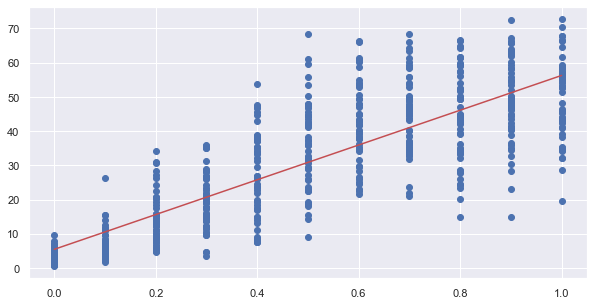

In [283]:
X = exp1a['news-sens']
y = exp1a['stddev']
# plt.scatter(X, y)
denominator = X.dot(X) - X.mean() * X.sum()
m = (X.dot(y) - y.mean() * X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator
y_pred = m*X + b

plt.scatter(X,y)
plt.plot(X, y_pred, 'r')

res = y - y_pred
tot = y - y.mean()
R2 = 1 - res.dot(res) / tot.dot(tot)

print("slope:",m, "\tR2:", R2)

### experiment 1 method B: influence by peers only

In [256]:
exp1b = pd.read_csv("exp1b-peers.csv", sep = ',')
exp1b = exp1b[['peer-sens','stddev', 'gini', 'winning-rate', 'net-worth']]

slope: -4.880951153339959 	R2: 0.24052156758919419


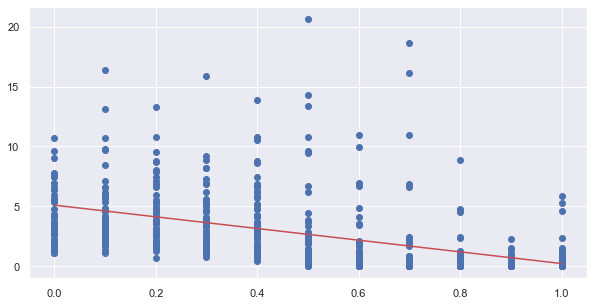

In [284]:
X = exp1b['peer-sens']
y = exp1b['stddev']
# plt.scatter(X, y)
denominator = X.dot(X) - X.mean() * X.sum()
m = (X.dot(y) - y.mean() * X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator
y_pred = m*X + b

plt.scatter(X,y)
plt.plot(X, y_pred, 'r')

res = y - y_pred
tot = y - y.mean()
R2 = 1 - res.dot(res) / tot.dot(tot)

print("slope:",m, "\tR2:", R2)

### experiment 1 method C: influence by influncers only

In [286]:
exp1c = pd.read_csv("exp1c-infl.csv", sep = ',')

In [287]:
exp1c = exp1c[['infl-sens', 'stddev', 'gini', 'winning-rate', 'net-worth']]

slope: 7.374823273452778 	R2: 0.43405968540804163


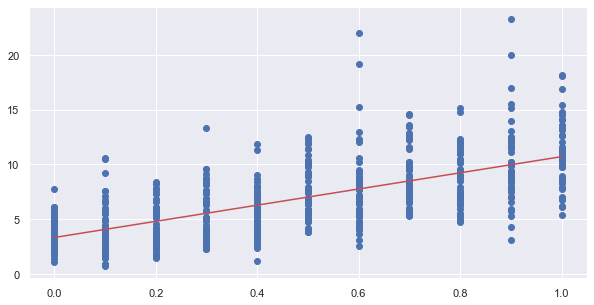

In [289]:
X = exp1c['infl-sens']
y = exp1c['stddev']
# plt.scatter(X, y)
denominator = X.dot(X) - X.mean() * X.sum()
m = (X.dot(y) - y.mean() * X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator
y_pred = m*X + b

plt.scatter(X,y)
plt.plot(X, y_pred, 'r')

res = y - y_pred
tot = y - y.mean()
R2 = 1 - res.dot(res) / tot.dot(tot)

print("slope:",m, "\tR2:", R2)

In [346]:
range_ = [  0.,  55., 110., 155., 223., 275., 335., 390., 442, 491., 549]

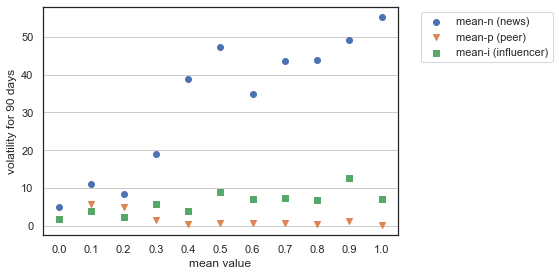

In [376]:
Xa = exp1a['news-sens'][range_]
ya = exp1a['stddev'][range_]
Xb = exp1b['peer-sens'][range_]
yb = exp1b['stddev'][range_]
Xc = exp1c['infl-sens'][range_]
yc = exp1c['stddev'][range_]

sns.set_style("white")
plt.figure(figsize = (8,4))
plt.scatter(Xa,ya,  marker='o', label = "mean-n (news)")
plt.scatter(Xb,yb,  marker="v", label = "mean-p (peer)")
plt.scatter(Xc,yc,  marker='s', label = "mean-i (influencer)")
plt.xticks(np.linspace(0,1,11))
plt.grid(axis = 'y')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel("mean value")
plt.ylabel("volatility for 90 days")
plt.tight_layout()
plt.savefig("method.png", dpi=120)


### experiment 1 method D : influence by news & influncers only

In [2]:
# peer-sens 0.5 fixed
exp1d = pd.read_csv("exp1-infl.csv", sep = ',')

In [4]:
exp1d = exp1d[['peer-sens','news-sens', 'infl-sens','stddev', 'gini', 'winning-rate', 'net-worth' ]]

In [5]:
exp1d = exp1d[exp1d['peer-sens'] == 0.5]

In [418]:
# exp1d['ratio-news-peer'] = exp1d['news-sens'].map(str) + '-' +  exp1d['peer-sens'].map(str)

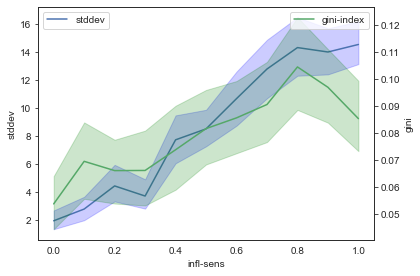

In [6]:
# news-sens with infl-sens
# stddev and winning-rate

sns.set_style("white")
sns.lineplot(data=exp1d, x="infl-sens", y="stddev", color = "b", label= 'stddev')
plt.legend(loc='upper left')
ax2 = plt.twinx()
sns.lineplot(data=exp1d, x='infl-sens', y="gini", color = "g", ax = ax2, label= 'gini-index') 
# plt.legend(loc='upper center')
# ax3 = plt.twinx()
# sns.lineplot(data=exp1d, x='infl-sens', y="winning-rate", color = "r", ax = ax3, label= 'winning-rate') 
# plt.xlabel("infl-sens (news-sens = 0.1)")
plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(7, 5)})
plt.tight_layout()
plt.savefig("exp1c-combi-gini.png", dpi=120)

# with peers-sens 0.5 increase stddev & gini > more distinguishable

In [7]:
# visualise the correlations between adjustable factors
corr = exp1c.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/heekim/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/heekim/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,peer-sens,news-sens,infl-sens,stddev,gini,winning-rate
peer-sens,nan,nan,nan,nan,nan,nan
news-sens,nan,nan,nan,nan,nan,nan
infl-sens,nan,nan,1.000000,0.627517,0.243080,0.042298
stddev,nan,nan,0.627517,1.000000,0.464399,-0.108369
gini,nan,nan,0.243080,0.464399,1.000000,-0.492199
winning-rate,nan,nan,0.042298,-0.108369,-0.492199,1.000000


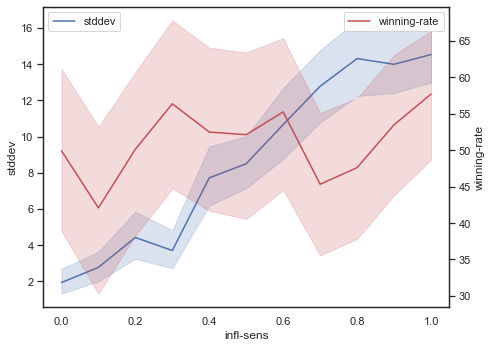

In [439]:
# news-sens with infl-sens
# stddev and winning-rate

sns.set_style("white")
sns.lineplot(data=exp1d, x="infl-sens", y="stddev", color = "b", label= 'stddev')
plt.legend(loc='upper left')
ax2 = plt.twinx()
# sns.lineplot(data=exp1d, x='infl-sens', y="gini", color = "b", ax = ax2, label= 'gini-index') 
# plt.legend(loc='upper center')

sns.lineplot(data=exp1d, x='infl-sens', y="winning-rate", color = "r", ax = ax2, label= 'winning-rate') 
plt.xlabel("infl-sens (news-sens = 0.1)")
plt.legend(loc='upper right')
sns.set(rc={'figure.figsize':(7, 5)})
plt.tight_layout()
plt.savefig("exp1c-combi-winning.png", dpi=120)

# Experiment 2 - assesses the effect of varying the topology of peer networks

which network setting can cause more variance when infl-sens exist w/o news-sens

infl-sens = 0.8 setting (maximising stddev/ gini)

Lattice vs free-scale vs free-scale with boosting (more links from infl) 

In [4]:
exp2 = pd.read_csv("exp2.csv", sep = ',')

In [5]:
exp2.type.unique()

array(['Lattice', 'Small-world', 'Random', 'Scalefree'], dtype=object)

In [20]:
mycmap = ['salmon', 'indianred', 'darkred', 'mediumturquoise']

### correlation between network interconnectedness and volatility (stddev)

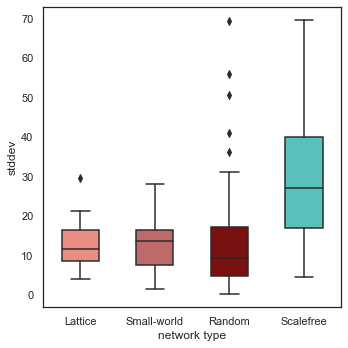

In [6]:
sns.set_style(style="white" ) 

sns.boxplot(x='type', y ="stddev", data = exp2 ,dodge=False , width=0.5, palette=mycmap )

sns.set(rc={'figure.figsize':(5, 5)})
plt.tight_layout()
plt.xlabel('network type')
plt.savefig("exp2-stddev.png", dpi=120)

### correlation between network interconnectedness and Gini index

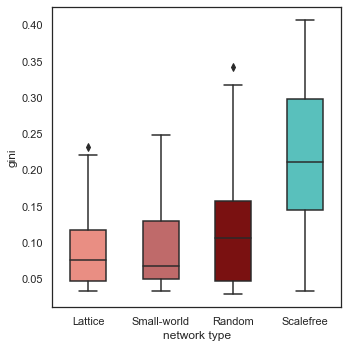

In [7]:
sns.set_style(style="white" ) 

sns.boxplot(x='type', y ="gini", data = exp2 ,dodge=False , width=0.5,  palette=mycmap )

sns.set(rc={'figure.figsize':(5, 5)})
plt.tight_layout()
plt.xlabel('network type')
plt.savefig("exp2-gini.png", dpi=120)

### the distribution of wealth at the end of the simulation

**1. Lattice**

In [6]:
exp2_lattice_worth = exp2[exp2['type']== 'Lattice']
exp2_lattice_worth = exp2_lattice_worth['net-worth']
exp2_lattice_worth_arr = exp2_lattice_worth.array

df_lattice = pd.DataFrame()
i = 0
for line in exp2_lattice_worth_arr:
    line = line.replace("[", "")
    line = line.replace("]", "")
    lines = line.split(" ")
    lines_arr = np.array(lines,dtype=float)
    df_lattice[i] = lines_arr
    i += 1

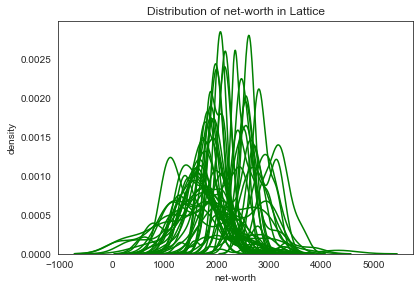

In [9]:
sns.set_style(style="white" ) 
for i in range(len(df_lattice.columns)):
    if i != 7:
        sns.distplot(df_lattice[i], color="green",bins=10, hist = False, kde = True, norm_hist = 0)
        
sns.set(rc={'figure.figsize':(8, 8)})
plt.tight_layout()
plt.ylabel("density")
plt.xlabel("net-worth")
plt.title("Distribution of net-worth in Lattice")
plt.savefig("exp2-lattice-dist.png", dpi=120)


**2. Small world**

In [11]:
# Small-world
exp2_smallworld_worth = exp2[exp2['type']== 'Small-world']
exp2_smallworld_worth = exp2_smallworld_worth['net-worth']
exp2_smallworld_worth_arr = exp2_smallworld_worth.array

df_smallworld = pd.DataFrame()
i = 0
for line in exp2_smallworld_worth_arr:
    line = line.replace("[", "")
    line = line.replace("]", "")
    lines = line.split(" ")
    lines_arr = np.array(lines,dtype=float)
    df_smallworld[i] = lines_arr
    i += 1

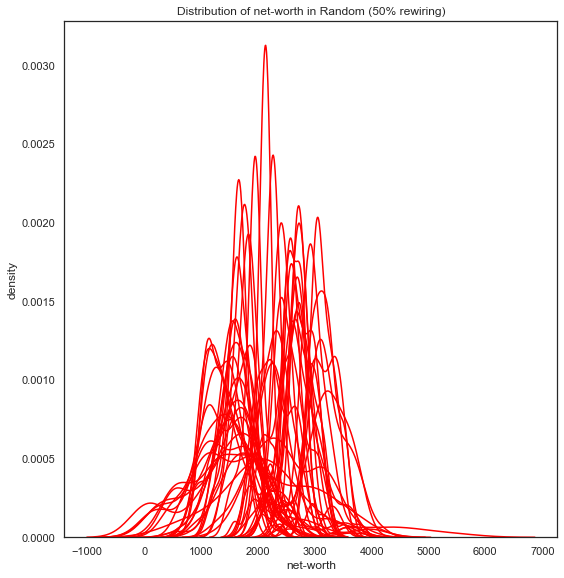

In [12]:
sns.set_style(style="white") 
for i in range(len(df_smallworld.columns)):
    sns.distplot(df_smallworld[i], color="red",bins=10, hist = False, kde = True, norm_hist = 0)
        
sns.set(rc={'figure.figsize':(8, 8)})
plt.tight_layout()
plt.ylabel("density")
plt.xlabel("net-worth")
plt.title("Distribution of net-worth in Smallworld (50% rewiring)")
plt.savefig("exp2-random-dist50%.png", dpi=120)


**3. Random**

In [14]:
# random
exp2_random_worth2 = exp2[exp2['type']== 'Random']
exp2_random_worth2 = exp2_random_worth2['net-worth']
exp2_random_worth_arr2 = exp2_random_worth2.array

df_random = pd.DataFrame()
i = 0
for line in exp2_random_worth_arr2:
    line = line.replace("[", "")
    line = line.replace("]", "")
    lines = line.split(" ")
    lines_arr = np.array(lines,dtype=float)
    df_random[i] = lines_arr
    i += 1

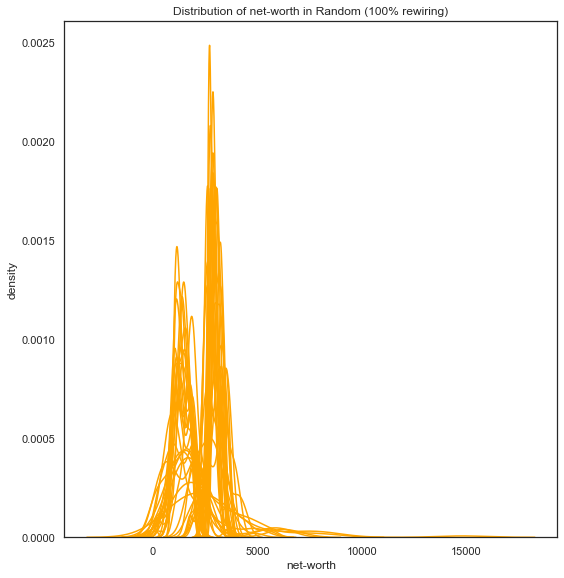

In [15]:
sns.set_style(style="white") 
for i in range(len(df_random.columns)):
    sns.distplot(df_random[i], color="orange",bins=10,hist = False, kde = True, norm_hist = 0)
        
sns.set(rc={'figure.figsize':(8, 8)})
plt.tight_layout()
plt.ylabel("density")
plt.xlabel("net-worth")
plt.title("Distribution of net-worth in Random (100% rewiring)")
plt.savefig("exp2-random-dist100%.png", dpi=120)


**4. Scalefree**

In [17]:
# scale free
exp2_scalefree_worth = exp2[exp2['type']== 'Scalefree']
exp2_scalefree_worth = exp2_scalefree_worth['net-worth']
exp2_scalefree_worth_arr = exp2_scalefree_worth.array

df_scalefree = pd.DataFrame()
i = 0
for line in exp2_scalefree_worth_arr:
    line = line.replace("[", "")
    line = line.replace("]", "")
    lines = line.split(" ")
    lines_arr = np.array(lines,dtype=float)
    df_scalefree[i] = lines_arr
    i += 1

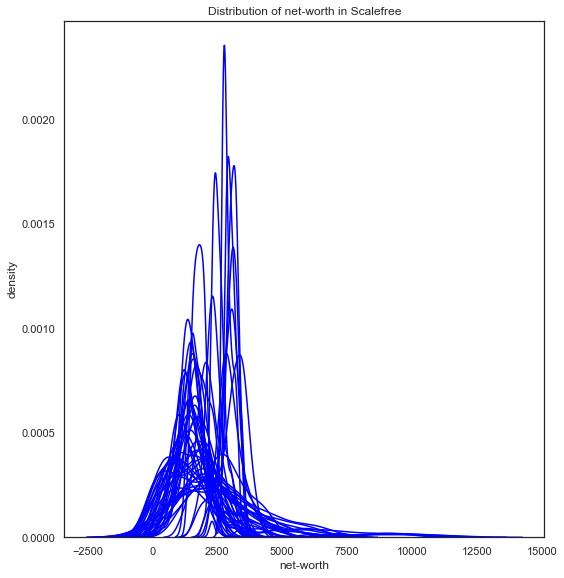

In [18]:
sns.set_style(style="white") 
for i in range(len(df_scalefree.columns)):
    sns.distplot(df_scalefree[i], color="blue",bins=10, hist = False, kde = True, norm_hist = 0)
        
sns.set(rc={'figure.figsize':(8, 8)})
plt.tight_layout()
plt.ylabel("density")
plt.xlabel("net-worth")
plt.title("Distribution of net-worth in Scalefree")
plt.savefig("exp2-scalefree-dist.png", dpi=120)


**Visualise an example from each network**

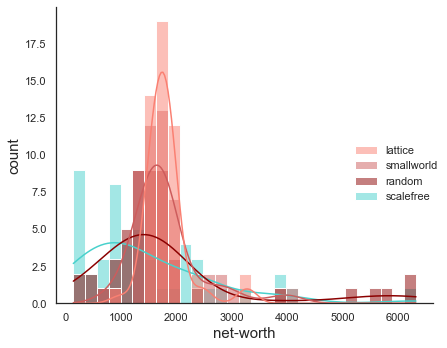

In [86]:
# sampel the most representative example 
df_all = pd.concat((df_lattice[35], df_smallworld[9], df_random[33], df_scalefree[32]), axis = 1)
df_all.columns = ['lattice', 'smallworld', 'random', 'scalefree']

sns.set_style(style="white" ) 

sns.displot(data = df_all, palette=mycmap, kde = True)
        
sns.set(rc={'figure.figsize':(5, 5)})
plt.ylabel("count", size = 15)
plt.xlabel("net-worth",size = 15)
plt.tight_layout()
plt.savefig("exp2-all.png", dpi=120)

**Quantitative analysis of the distribution**

In [59]:
from scipy.stats import skew, kurtosis

In [80]:
print("lattice",np.average(skew(df_lattice[35],bias=False)))
print("sw",np.average(skew(df_smallworld[9],bias=False)))
print("random",np.average(skew(df_random[33],bias=False)))
print("Sclafree",np.average(skew(df_scalefree[32],bias=False)))

lattice 2.2436856443826674
sw 1.863374572465409
random 2.130195771749326
Sclafree 1.676694782544625


In [81]:
print('kurtosis')
print("lattice",np.average(kurtosis(df_lattice[35],bias=False)))
print("sw",np.average(kurtosis(df_smallworld[9],bias=False)))
print("random",np.average(kurtosis(df_random[33],bias=False)))
print("Sclafree",np.average(kurtosis(df_scalefree[32],bias=False)))

kurtosis
lattice 7.546186412288204
sw 4.393140939300239
random 3.880975464397288
Sclafree 3.8507273436218163


In [96]:
for i in [1,2]:
    print(i)
    print("lattice",np.average(skew(df_lattice[i],bias=False)))
    print("sw",np.average(skew(df_smallworld[i],bias=False)))
    print("random",np.average(skew(df_random[i],bias=False)))
    print("Sclafree",np.average(skew(df_scalefree[i],bias=False)))
    print("-------")
    print("lattice",np.average(kurtosis(df_lattice[i],bias=False)))
    print("sw",np.average(kurtosis(df_smallworld[i],bias=False)))
    print("random",np.average(kurtosis(df_random[i],bias=False)))
    print("Sclafree",np.average(kurtosis(df_scalefree[i],bias=False)))
    

1
lattice -0.4361259480832974
sw -0.599912987972237
random 0.5118100931108223
Sclafree 2.218118911442252
-------
lattice -0.3204412694854293
sw -0.9066527357245482
random 0.2155575563871328
Sclafree 6.414309800162169
2
lattice 0.014776812557888801
sw -0.2056530178149599
random -0.661407496708922
Sclafree 0.08464153119862354
-------
lattice -1.1848480162102206
sw 0.8460574312847644
random 1.0708414067854193
Sclafree -0.6399427776476032
